In [51]:
# CSDS 391
# Student: Sanket Makkar
# CaseId: sxm1626
# Homework 6
import random
import matplotlib.pyplot as plotter

class CandiesPuzzle:
    def __init__(self, numberOfCandies=10, priorCandyRatios=[0.1,0.2,0.4,0.2,0.1], hypothesis=[1.0, 0.75, 0.5,0.25,0]):
        self.candiesDrawCount=numberOfCandies
        self.priorCandyRatios=priorCandyRatios
        self.hypothesis=hypothesis
        
    def inferenceStep(self, observation): # pass in an observation to consider
        # find the likelihood of the result we observed
        likelihoodOfResult = [hypothesis if observation == 1 else (1-hypothesis) for hypothesis in self.hypothesis]

        # this is the step where we do prior * likelihood
        posteriorResult = [prior * likelihood for prior, likelihood in zip(self.priorCandyRatios, likelihoodOfResult)]
        
        # normalizing posteriorResult without extensive computation, just divide by sum
        posteriorSum = sum(posteriorResult)
        posteriorResult = [result / posteriorSum for result in posteriorResult]  # Normalize

        return posteriorResult

    def triggerInferences(self, observations=[1]):
        changes = []
        if len(observations) > self.candiesDrawCount:
            observations=observations[:self.candiesDrawCount]
        elif len(observations) < self.candiesDrawCount:
            observations += [1]*(self.candiesDrawCount - len(observations))
        for observation in observations:
            newPrior = self.inferenceStep(observation)
            self.priorCandyRatios = newPrior
            changes.append(newPrior)
        self.mapFunc(changes)

    def mapFunc(self, newPrior):
        xcoords = []
        xcoords = list(range(1, self.candiesDrawCount + 1)) 
        ycoords = newPrior

        hypothesisColors=['red','orange','yellow','green','blue']
        for i in range(len(self.hypothesis)):
            ycoords = [prior[i] for prior in newPrior]  
            plotter.plot(xcoords, ycoords, color=hypothesisColors[i])

        plotter.title("Hypothesis Probabilities Posterior")
        plotter.xlabel("Drawcount")
        plotter.ylabel("p(h_i|d)")
        plotter.show()
        

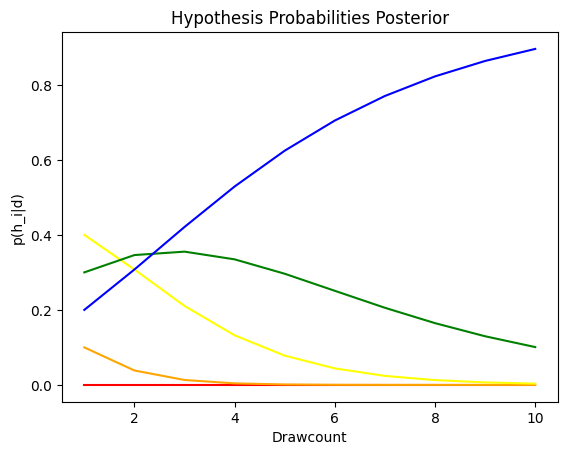

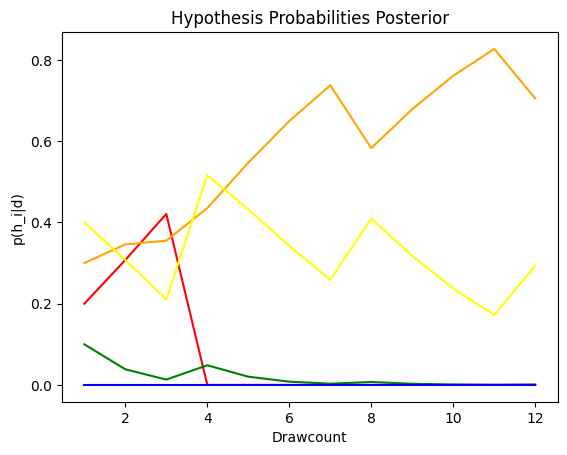

In [56]:
# For part c
# h5 bag result
h5 = CandiesPuzzle(numberOfCandies=10)
observations = [0]*10
h5.triggerInferences(observations)
# h2 bag result
h2 = CandiesPuzzle(numberOfCandies=12)
observations = [1,1,1,0, 1,1,1,0, 1,1,1,0]
h2.triggerInferences(observations)